# Two ways of reading NOAA CO-OPS data using pydap via ERDDAP

You can specify the parameters within the URL, or from within Python. With thanks to https://groups.google.com/forum/#!msg/pydap/FH0UQ0QbwTw/FnMP3qZS-0oJ

We'll look at [8570283](https://tidesandcurrents.noaa.gov/stationhome.html?id=8570283), Ocean City Inlet, MD for the date range 2014-08-01 to 2014-09-01.

The CO-OPS ERDDAP page for hourly verified water levels is available at http://opendap.co-ops.nos.noaa.gov/erddap/tabledap/IOOS_Hourly_Height_Verified_Water_Level.html

In [1]:
from pydap.client import open_url, open_dods
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Method 1 (in the URL)

In [2]:
# Here we will specify the station id and start/end times in the URL and plot the data

# Open the dataset using the .dods extension and with request parameters within the URL. Note STATION_ID, BEGIN_DATE, END_DATE, and DATUM within the URL
url = 'https://opendap.co-ops.nos.noaa.gov/erddap/tabledap/IOOS_Hourly_Height_Verified_Water_Level.dods?STATION_ID,latitude,longitude,DATUM,BEGIN_DATE,END_DATE,time,WL_VALUE,SIGMA,I,L&STATION_ID="8570283"&DATUM="MLLW"&BEGIN_DATE="20140801"&END_DATE="20140901"'
print(url)
d = open_dods(url)
s = d['s'] # everything is inside 's'

https://opendap.co-ops.nos.noaa.gov/erddap/tabledap/IOOS_Hourly_Height_Verified_Water_Level.dods?STATION_ID,latitude,longitude,DATUM,BEGIN_DATE,END_DATE,time,WL_VALUE,SIGMA,I,L&STATION_ID="8570283"&DATUM="MLLW"&BEGIN_DATE="20140801"&END_DATE="20140901"


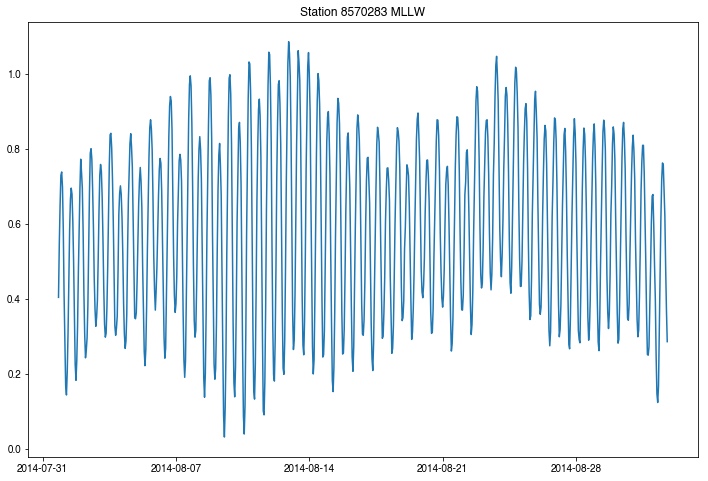

In [3]:
# Construct Python datetimes from the times returned from the open_dods request
t = [datetime.datetime.fromtimestamp(date) for date in s['time']]
wl = [x for x in s['WL_VALUE']]
station_id = list(s['STATION_ID'])[0]
datum = list(s['DATUM'])[0]

plt.figure(figsize=(12,8))
plt.plot(t, wl)
plt.title('Station %s %s' % (station_id, datum))
plt.show()

# Method 2 (inside Python)

In [4]:
# Now we will select the data we want from within Python. 

# Open the dataset without specifying station or start/end times
# dataset = open_url('http://test.opendap.org/dap/data/nc/coads_climatology.nc')
d = open_url('https://opendap.co-ops.nos.noaa.gov/erddap/tabledap/IOOS_Hourly_Height_Verified_Water_Level')
s = d['s'] # everything is inside 's'

In [5]:
# Specify the start and end dates in the funky format that CO-OPS wants
start = datetime.datetime(2014,8,1).strftime("%Y%m%d")
end = datetime.datetime(2014,9,1).strftime("%Y%m%d")
station = str(8570283) # station must be a string
datum = 'MLLW'

# Construct a ConstraintExpression for the data we are interested in
lims = (s.STATION_ID == station) & (s.BEGIN_DATE == start) & (s.END_DATE == end) & (s.DATUM == datum)

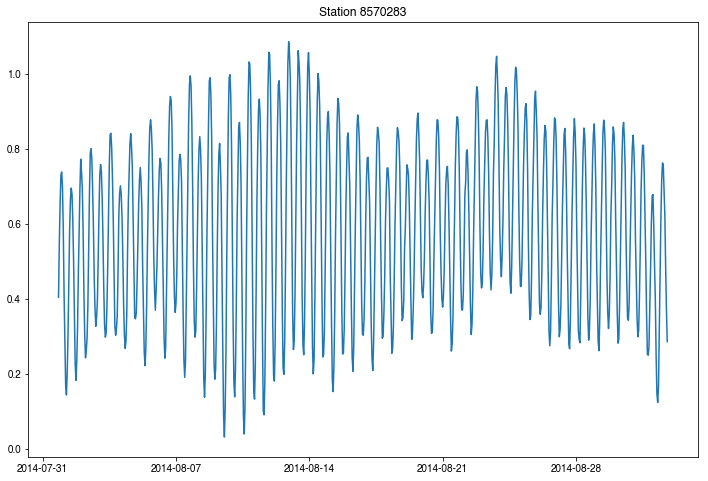

In [6]:
# We are only interested in the data within the limits we set above

# Construct Python datetimes from the times returned from the open_url request subject to the limits we set above
# The SequenceData object must be iterated over to return the data
t = [datetime.datetime.fromtimestamp(date) for date in s[lims]['time']]
wl = [a for a in s[lims]['WL_VALUE']]
station_id = [a for a in s[lims]['STATION_ID']]

plt.figure(figsize=(12,8))
plt.plot(t, wl)
plt.title('Station {}'.format(station_id[0]))
plt.show()